In [1]:
path = '/content/drive/MyDrive/Deep Learning/Gesture Detection/leapGestRecog'

In [2]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import cv2
import os
from PIL import Image

In [3]:
lookup = dict()
reverselookup = dict()
count = 0

for i in os.listdir(path + '/00'):
  if not i.startswith('.'):
    lookup[i] = count
    reverselookup[count] = i
    count = count + 1

lookup
reverselookup

{0: '01_palm',
 1: '02_l',
 2: '03_fist',
 3: '04_fist_moved',
 4: '05_thumb',
 5: '06_index',
 6: '07_ok',
 7: '08_palm_moved',
 8: '09_c',
 9: '10_down'}

In [40]:
x_data = [] 
y_data = []
numImages = 0

newpath = path[:]
print(newpath)

i = 0
for j in os.listdir(path + '/0' + str(i) + '/'):
  if not j.startswith('.'):
    countOfGesture = 0
    for k in os.listdir(path + '/0' + str(i) + '/' + j + '/'):
      newpath = path + '/0' + str(i) + '/' + j + '/' + k 
      img = cv2.imread(newpath, cv2.IMREAD_GRAYSCALE)
      img = cv2.resize(img, (150, 150))
      arr = np.array(img)
      # arr = arr/255
      x_data.append(arr)
      print(numImages, countOfGesture)
      countOfGesture += 1
    y_values = np.full((countOfGesture, 1), lookup[j])
    y_data.append(y_values)
    numImages += countOfGesture

x_data = np.array(x_data)
y_data = np.array(y_data)

/content/drive/MyDrive/Deep Learning/Gesture Detection/leapGestRecog
0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 1

In [42]:
y_data = y_data.reshape(numImages, 1)

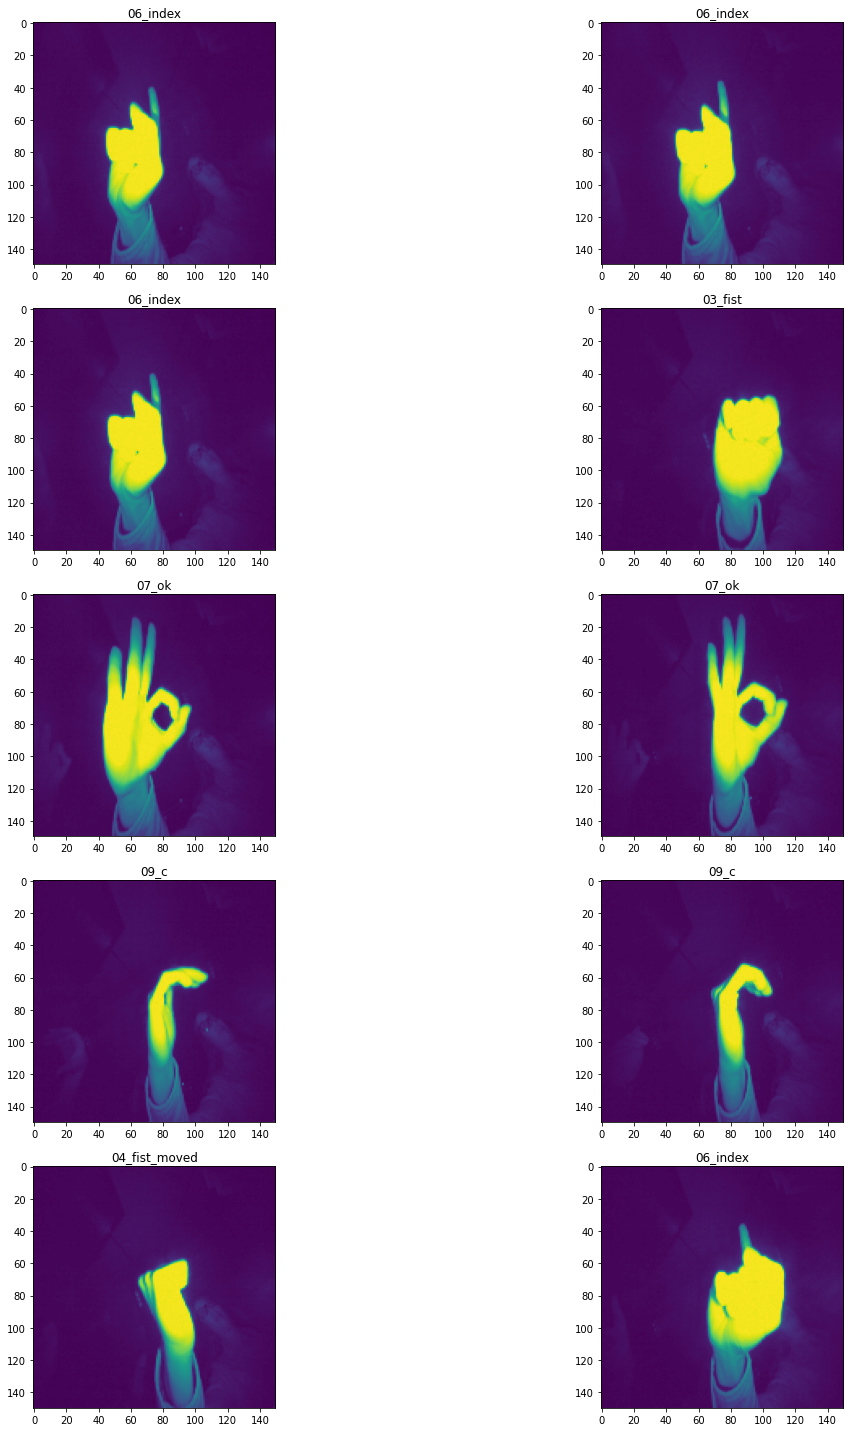

In [43]:
import matplotlib.pyplot as plt
import random

fig, ax = plt.subplots(5,2)
fig.set_size_inches(20,20)

for i in range(5):
  for j in range(2):
    l = random.randint(0, len(y_data))
    ax[i, j].imshow(x_data[l])
    ax[i,j].set_title(reverselookup[y_data[l,0]])

plt.tight_layout()

In [44]:
x_data[0].shape

(150, 150)

In [46]:
from keras.utils import to_categorical

y_data = to_categorical(y_data)

In [47]:
from keras.applications.vgg16 import VGG16, preprocess_input

conv_base = VGG16(include_top=False,
                     weights='imagenet', 
                     input_shape=(150,150,3))

58892288/58889256 [==============================] - 1s 0us/step


In [100]:
from keras.layers import Flatten, Dense, Dropout
from keras.models import Model
from keras.optimizers import SGD

for layer in conv_base.layers:
  layer.trainable = False

top_model = conv_base.output
top_model = Flatten(name="flatten")(top_model)
top_model = Dense(4096, activation='relu')(top_model)
top_model = Dense(1072, activation='relu')(top_model)
top_model = Dropout(0.2)(top_model)
output_layer = Dense(10, activation='softmax')(top_model)

model = Model(inputs=conv_base.input, outputs=output_layer)

model.compile(optimizer=SGD(lr=1e-4, momentum=0.9), 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [50]:
!pip install livelossplot

In [104]:
from livelossplot.inputs.keras import PlotLossesCallback
from keras.callbacks import ModelCheckpoint, EarlyStopping

plot_loss_1 = PlotLossesCallback()

tl_checkpoint_1 = ModelCheckpoint(filepath=path + '/trained-models',
                                  save_best_only=True,
                                  verbose=1,
                                  monitor='val_loss')
# early_stop = EarlyStopping(monitor='val_loss',
#                            patience=10,
#                            restore_best_weights=True,
#                            mode='min')

In [56]:
#increase dimensions
x_data = np.array(x_data, dtype = 'float32')
x_data = np.stack((x_data,) * 3, axis=-1)

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=33)

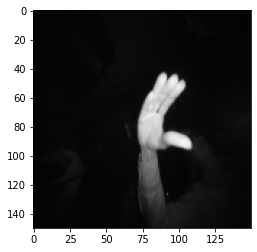

In [102]:
plt.imshow(X_train[10]/255)

In [105]:
model.fit(x=X_train, y=Y_train, validation_split=0.2, batch_size=300, epochs=50, callbacks=[tl_checkpoint_1])

Epoch 1/50
5/5 [==============================] - 2s 338ms/step - loss: 3.4895e-04 - accuracy: 1.0000 - val_loss: 3.9518e-06 - val_accuracy: 1.0000

Epoch 00001: val_loss improved from inf to 0.00000, saving model to /content/drive/MyDrive/Deep Learning/Gesture Detection/leapGestRecog/trained-models
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Deep Learning/Gesture Detection/leapGestRecog/trained-models/assets
Epoch 2/50
5/5 [==============================] - 2s 328ms/step - loss: 0.0020 - accuracy: 0.9992 - val_loss: 4.0661e-06 - val_accuracy: 1.0000

Epoch 00002: val_loss did not improve from 0.00000
Epoch 3/50
5/5 [==============================] - 2s 329ms/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 3.6303e-06 - val_accuracy: 1.0000

Epoch 00003: val_loss improved from 0.00000 to 0.00000, saving model to /content/drive/MyDrive/Deep Learning/Gesture Detection/leapGestRecog/trained-models
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Deep Learning/Gest

In [106]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

In [107]:
from sklearn.metrics import accuracy_score

vgg_acc = accuracy_score(np.argmax(Y_test, axis=1), y_pred_classes)
print("VGG16 Model Accuracy without Fine-Tuning: {:.2f}%".format(vgg_acc * 100))

VGG16 Model Accuracy without Fine-Tuning: 100.00%


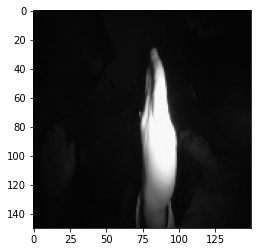

In [109]:
plt.imshow(X_test[150]/255)

In [ ]:
# ! cp kaggle.json ~/.kaggle/

In [110]:
Y_test[150]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

I have no idea how the accuracy is this high, but it checks out for some images I manually tested. I trained with 1/10th of the available data due to the lack of computational power.

In [ ]:
# !kaggle datasets download -d keras/vgg16

In [ ]:
# !unzip '/content/vgg16.zip'

In [ ]:
# !cp -r '/content/vgg16' '/content/drive/MyDrive/Deep Learning/Gesture Detection'

In [ ]:
# !cp -r '/content/drive/MyDrive/Deep Learning/Gesture Detection/leapGestRecog' '/content'